In [1]:
import glob
import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt
from tqdm import tqdm
import multiprocessing as mp
import os
from build import build_model
from matplotlib_venn import venn3,venn2
import os

In [2]:
from IPython.display import display, HTML, Math, Markdown
display(HTML("<style>.container { width:95% !important; }</style>"))

%load_ext autoreload
%autoreload 2

In [3]:
organisms = {i.split(".gb")[0] for i in os.listdir("./agora-models/genbank-mixed-ncbi-agora-sources/")}

In [4]:
!bash report.sh
step1 = set(pandas.read_csv("step1.txt",index_col=0,header=None).index.to_list())
step2 = set(pandas.read_csv("step2.txt",index_col=0,header=None).index.to_list())
try:
    step3 = set(pandas.read_csv("step3.txt",index_col=0,header=None).index.to_list())
except:
    step3 = set()
no_overlap = set(pandas.read_csv("no_overlap.txt",index_col=0,header=None).index.to_list())
trna_issues = set(pandas.read_csv("trna_issues.txt",index_col=0,header=None).index.to_list())

try:
    trna_ts_issues = set(pandas.read_csv("trna_ts_issues.txt",index_col=0,header=None).index.to_list())
except:
    trna_ts_issues = set()

In [9]:
len(organisms)+19

775

In [5]:
# Organisms with genome overlap that finished step 1 but did not finish step 2
# Presumbaly due to gene divisible by 3 issue, pseudo genes
step1-step2-no_overlap

set()

In [6]:
# Organisms with genome overlap that did not finish step1
# Problematic GPRs like MANpts
organisms - step1 - no_overlap

set()

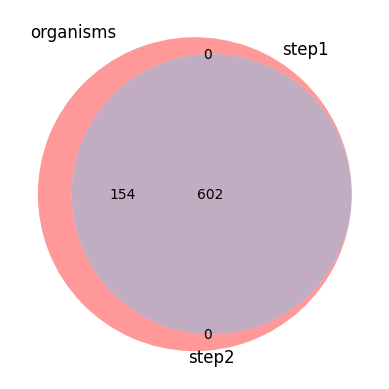

In [7]:
venn3([organisms,step1,step2], ("organisms","step1","step2"))

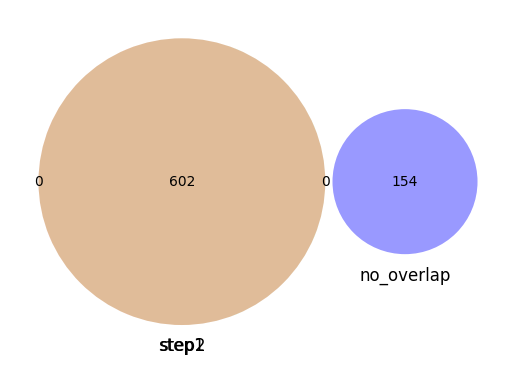

In [8]:
venn3([step1,step2,no_overlap], ("step1","step2","no_overlap"))

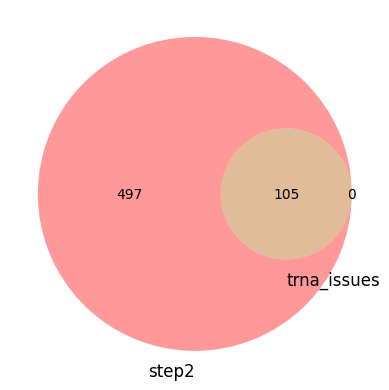

In [9]:
venn2([step2,trna_issues], ("step2","trna_issues"))

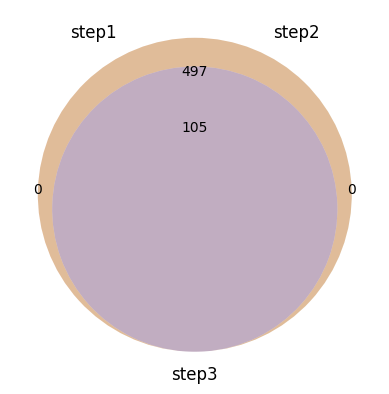

In [10]:
venn3([step1,step2,step3], ("step1","step2","step3"))

/home/jt/venvs/coralme/lib/python3.10/site-packages/matplotlib_venn/_venn3.py:53: UserWarning: Circle A has zero area
  warnings.warn("Circle A has zero area")


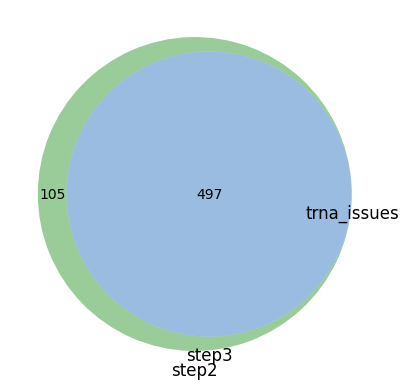

In [11]:
venn3([trna_ts_issues,step2,step3], ("trna_issues","step2","step3"))

In [13]:
pandas.DataFrame(columns=list(step3 - trna_ts_issues)).T.sort_index().to_csv("survivors.txt",header=None)

In [13]:
trna_ts_issues

set()